# Minimización

Utilizaremos como ejemplo una función tipo $\chi^2$ para demostrar algunas funciones de minimización.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import numpy
import matplotlib.pyplot as plt
from scipy.optimize import (leastsq, curve_fit)

# Creando datos falsos para fitear

Crearemos datos de la siguiente funcion (esta es la función que querremos recuperar luego):

$$ y(x) = A_1 \times \exp\left({\frac{-(x-\mu_1)^2}{\sigma_1^2}}\right) + 2 \times \exp{\left(\frac{-(x+\mu_2)^2}{\sigma_2^2}\right)} + \epsilon $$

con:
$$ A_1 = 3.5; \mu_1 = 3.0; \sigma_1 = \sqrt{3.0}$$
y
$$ A_2 = 2.0; \mu_2 = 1.5; \sigma_2 = \sqrt{0.5}$$


In [3]:
def f_modelo(params, x):
    A1, mu1, sigma1, A2, mu2, sigma2 = params
    return A1 * np.exp(-(x-mu1)**2/sigma1**2) + A2 * np.exp(-(x - mu2)**2/sigma2**2)

# Los parametros que luego querremos recuperar:
p_real = 3.5, 3.0, np.sqrt(3), 2., -1.5, np.sqrt(0.5)

### Visualizando la función

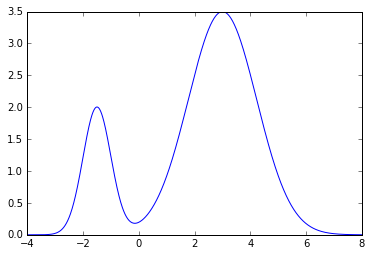

In [4]:
x = np.linspace(-4, 8, 1000)
plt.plot(x, f_modelo(p_real, x))

### Agregando ruido a los datos para que no sea trivial recuperar la función

In [5]:
np.random.seed(1544)
x_muestra = np.random.uniform(low=-4, high=8, size=80)
y_scales = np.random.uniform(low=0.1, high=0.8, size=len(x_muestra))
y_muestra = f_modelo(p_real, x_muestra) + np.random.normal(loc=0, scale=1, size=len(x_muestra)) * y_scales

<Container object of 3 artists>

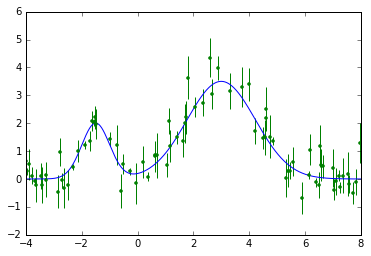

In [6]:
plt.plot(x, f_modelo(p_real, x))
plt.errorbar(x_muestra, y_muestra, yerr=y_scales, marker='.', ls='None', capsize=0.)

### Hasta ahora no hemos hecho nada, solo definido los datos que queremos modelar.
A continuacion haremos los fits.

Para ello definimos nuestra función de mérito que es la que queremos minimizar:

$$ \chi^2 = \sum_{i=0}^N \left[y_i - f_{modelo}(x_i, \vec{p})\right]^2$$

## Usando la funcion `leastsq`

Se debe definir una funcion, que entrega N componentes, donde N es el tamaño de la muestra. `leastsq` se encarga de elevar al cuadrado cada componente y hacer la suma.

In [7]:
def func_a_minimizar(params, xdata, ydata):
    return (ydata - f_modelo(params, xdata))

In [8]:
p0 = 2., 2., 1., 1., -1., 1. # punto de partida del algoritmo
resultado = leastsq(func_a_minimizar, p0, args=(x_muestra, y_muestra))

In [9]:
print "Status: ", resultado[1]
print "mejor fit: ", resultado[0]
print "parametros originales: ", p_real

Status:  1
mejor fit:  [ 3.73794145  3.0044089   1.78499394  2.11602814 -1.42543207  0.64944745]
parametros originales:  (3.5, 3.0, 1.7320508075688772, 2.0, -1.5, 0.70710678118654757)


### Veamos como se ve el fit obtenido

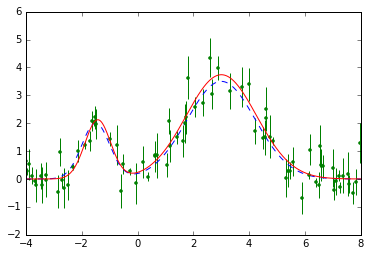

In [10]:
plt.plot(x, f_modelo(p_real, x), 'b--')
plt.errorbar(x_muestra, y_muestra, yerr=y_scales, marker='.', ls='None', capsize=0., color='g')
plt.plot(x, f_modelo(resultado[0], x), 'r-')

## `curve_fit`

`curve_fit` es un wrapper para que llamar a `leastsq` sea un poco mas fácil.
Noten que la función que hay que entregarle es un poco distinta.

In [11]:
def func_a_minimizar_con_cf(x, A1, mu1, sigma1, A2, mu2, sigma2):
    params = A1, mu1, sigma1, A2, mu2, sigma2
    return f_modelo(params, x)

In [12]:
p_optimo, p_covarianza = curve_fit(func_a_minimizar_con_cf, x_muestra, y_muestra, p0)

In [13]:
p_optimo

array([ 3.73794145,  3.0044089 ,  1.78499394,  2.11602814, -1.42543207,
        0.64944745])

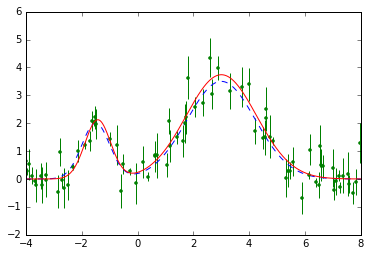

In [14]:
plt.plot(x, f_modelo(p_real, x), 'b--')
plt.errorbar(x_muestra, y_muestra, yerr=y_scales, marker='.', ls='None', capsize=0., color='g')
plt.plot(x, f_modelo(p_optimo, x), 'r-')

### El metodo es muy sensible a los parametros iniciales de busqueda, especialmente para muchos parametros.

In [15]:
p0 = np.ones(6)
p_optimo2, p_covarianza2 = curve_fit(func_a_minimizar_con_cf, x_muestra, y_muestra, p0)
print p_optimo
print p_optimo2

[ 3.73794145  3.0044089   1.78499394  2.11602814 -1.42543207  0.64944745]
[ 2.11601602 -1.42542726 -0.64946139  3.73794341  3.00440924 -1.78499243]


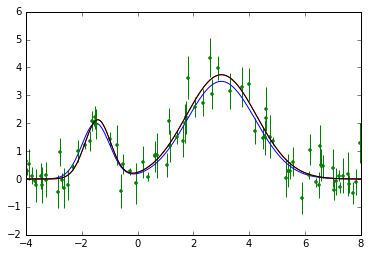

In [16]:
plt.plot(x, f_modelo(p_real, x))
plt.errorbar(x_muestra, y_muestra, yerr=y_scales, marker='.', ls='None', capsize=0.)
plt.plot(x, f_modelo(p_optimo, x))
plt.plot(x, f_modelo(p_optimo2, x), 'k') 

### Probemos otro punto de partida

In [17]:
p0 = 3. * np.ones(6)
p_optimo3, p_covarianza3 = curve_fit(func_a_minimizar_con_cf, x_muestra, y_muestra, p0)
print p_optimo
print p_optimo3

[ 3.73794145  3.0044089   1.78499394  2.11602814 -1.42543207  0.64944745]
[   3.67972363    2.99321302    1.82875388 -150.49306614 -479.27513794
  -75.68225819]


/Users/tino/anaconda/lib/python2.7/site-packages/scipy/optimize/minpack.py:604: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


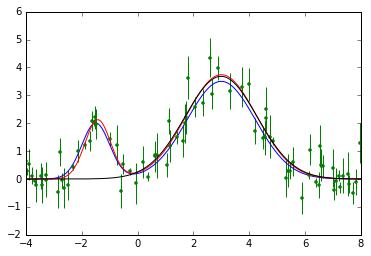

In [18]:
plt.plot(x, f_modelo(p_real, x))
plt.errorbar(x_muestra, y_muestra, yerr=y_scales, marker='.', ls='None', capsize=0.)
plt.plot(x, f_modelo(p_optimo, x))
plt.plot(x, f_modelo(p_optimo3, x), 'k')

# Recomendaciones.

Busquen una implementacion más amigable de estas mismas funciones, en particular hay varias que entregan los errores estandard asociados a los parmetros, entre otras bondades.
[link](http://www.astro.rug.nl/software/kapteyn/kmpfittutorial.html)

* `lmfit`
* `kmpfit` [(tutorial muy bueno)](http://www.astro.rug.nl/software/kapteyn/kmpfittutorial.html)
* `python sherpa`
    
A continuacion un ejemplo usando `lmfit`. Para instalarlo, deberia bastar con:

        >>> conda install -c https://conda.anaconda.org/tritemio lmfit

In [19]:
import lmfit
from lmfit import (minimize, Parameters, report_fit)

/Users/tino/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [20]:
def residual(params, x, y, yerr):
    A1 = params['A1'].value
    mu1 = params['mu1'].value
    sigma1 = params['sigma1'].value
    A2 = params['A2'].value
    mu2 = params['mu2'].value
    sigma2 = params['sigma2'].value
    modelo = A1 * numpy.exp(-(x-mu1)**2/sigma1**2) + A2 * numpy.exp(-(x - mu2)**2/sigma2**2)
    return (y - modelo) / yerr

In [21]:
params = Parameters()
params.add('A1', value=1)
params.add('mu1', value=1)
params.add('sigma1', value=1)
params.add('A2', value=1)
params.add('mu2', value=1)
params.add('sigma2', value=1)

In [22]:
out = minimize(residual, params, args=(x_muestra, y_muestra, y_scales))

In [23]:
report_fit(out)

[[Fit Statistics]]
    # function evals   = 119
    # data points      = 80
    # variables        = 6
    chi-square         = 68.017
    reduced chi-square = 0.919
[[Variables]]
    A1:       3.74544269 +/- 0.213600 (5.70%) (init= 1)
    mu1:      3.04675072 +/- 0.049351 (1.62%) (init= 1)
    sigma1:   1.71629997 +/- 0.069459 (4.05%) (init= 1)
    A2:       2.09109997 +/- 0.114365 (5.47%) (init= 1)
    mu2:     -1.40953320 +/- 0.041272 (2.93%) (init= 1)
    sigma2:   0.69621812 +/- 0.044194 (6.35%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(A1, sigma1)                = -0.710 
    C(A2, mu2)                   =  0.433 
    C(A2, sigma2)                = -0.324 
    C(mu2, sigma2)               =  0.266 
    C(mu1, sigma1)               = -0.169 
    C(sigma1, sigma2)            = -0.145 
    C(sigma1, mu2)               = -0.135 
    C(A1, mu1)                   =  0.113 


## Otras recomendaciones

Para problemas lineales pueden usar los métodos descritos antes pero es más eficiente y seguro utilizar otros métodos más adecuados. En particular, si planean fitear un polinomio a los datos, `numpy.polifit` es una alternativa rápida. 

[`statsmodels`](http://statsmodels.sourceforge.net/) es un módulo más completo que implementa regresiones lineales y regresiones lineales generalizadas.